In [1]:
import os, math, sys, scipy
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
from matplotlib.offsetbox import AnchoredText

import seaborn as sns

In [2]:
BASES     = ['A','C','G','T']
COMP      = {'A':'T', 'T':'A', 'C':'G', 'G':'C','.':'.'}

def dna_seq_complement(sequence_string):
    COMP = {'A':'T', 'T':'A', 'C':'G', 'G':'C','.':'.'}
    STEP = sequence_string[::-1]
    STEP = ''.join([COMP[STEP[i]] for i in range(len(STEP))])
    return STEP

DIMERS    = [b+c for b in ['A','C','G','T'] for c in ['A','C','G','T']]
TETRAMERS = [a+b+c+d for a in ['A','C','G','T'] for b in BASES for c in BASES for d in ['A','C','G','T']]

DIMER_LST = ['AT','AC','GC'] + ['AG','GG','GA','AA'] + ['CG','CA','TA']
TETRAMER_LST = [
    'AAAA','AACA','AAGA','AATA','ACAA','ACGA','AGAA','AGCA','AGGA','ATAA',
    'AAAC','AACC','AAGC','AATC','ACAC','ACGC','AGAC','AGCC','AGGC','ATAC',
    'AAAG','AACG','AAGG','AATG','ACAG','ACGG','AGAG','AGCG','AGGG','ATAG',
    'AAAT','AACT','AAGT','AATT','ACAT','ACGT','AGAT','AGCT','AGGT','ATAT',
    'CAAA','CACA','CAGA','CATA','CCAA','CCGA','CGAA','CGCA','CGGA','CTAA',
    'CAAC','CACC','CAGC','CCAC','CGAC','CGGC','CAAG','CACG','CAGG','CATG',
    'CCAG','CCGG','CGAG','CGCG','CGGG','CTAG','CAAT','CACT','CAGT','CCAT',
    'CGAT','CGGT','GAAA','GACA','GAGA','GATA','GCAA','GCGA','GGAA','GGCA',
    'GGGA','GTAA','GAAC','GACC','GAGC','GATC','GCAC','GCGC','GGAC','GGCC',
    'GGGC','GTAC','GAAG','GACG','GAGG','GATG','GCAG','GCGG','GGAG','GGCG',
    'GGGG','GTAG','GAAT','GACT','GAGT','GCAT','GGAT','GGGT','TAAA','TACA',
    'TAGA','TATA','TCAA','TCGA','TGAA','TGCA','TGGA','TTAA','TAAC','TACC',
    'TAGC','TCAC','TGAC','TGGC','TAAG','TACG','TAGG','TCAG','TGAG','TGGG',
    'TAAT','TACT','TAGT','TCAT','TGAT','TGGT'
]

SCDIM = []
for DIM in DIMERS:
    if COMP[DIM[1]]+COMP[DIM[0]]==DIM:
        SCDIM.append(DIM)
SCTET = []
for TET in TETRAMERS:
    if COMP[TET[3]]+COMP[TET[2]]+COMP[TET[1]]+COMP[TET[0]]==TET and '.' not in TET:
        SCTET.append(TET)

In [3]:
zech336 = "AGCCGGAAGCCTATGTACCGAGTTCCGACACTTTCATTGAGAAAGATGCCTCAGCTCTGTTACAGGTCACTAATACCATCTAAGTAGTTGATTCATAGTGACTGCATATGTTGTGTTTTACAGTATTATGTAGTCTGTTTTTTATGCAAAATCTAATTTAATATATTGATATTTATATCATTTTACGTTTCTCGTTCAGCTTTTTTATACTAACTTGAGCGAAACGGGAAGGGTTTTCACCGATATCACCGAAACGCGCGAGGCAGCTGTATGGCATGAAAGAGTTCTTCCCGGAAAACGCGGTGGAATATTTCGTTTCCTACTACGACTACTATC"
attr    = zech336[44:44+180]

len(attr)

180

### step counts

In [213]:
full_dimer_df = pd.DataFrame(index=['A','G','C','T'],columns=['A','G','C','T'])
for DIM in DIMERS:
    i = 0
    for j in range(len(zech336)):
        if zech336[j:j+2] == DIM:
            i += 1
    full_dimer_df.at[DIM[0:1], DIM[1:]] = i
    del i

dimer_df = pd.DataFrame(index=['A','G','C','T'],columns=['A','G','C','T'])
for DIM in DIMER_LST:
    i = 0
    for j in range(len(zech336)):
        if zech336[j:j+2] == DIM or zech336[j:j+2] == dna_seq_complement(DIM):
            i += 1
    dimer_df.at[DIM[0:1], DIM[1:]] = i
    del i
dimer_df = dimer_df.fillna(0)

full_dimer_df=full_dimer_df.astype(int)
dimer_df=dimer_df.astype(int)


In [214]:
dimeric_step_lst = [a+b for a in ['A','G','C','T'] for b in ['A','G','C','T']]
full_tetramer_df = pd.DataFrame(index=[i for i in dimeric_step_lst], columns=[i[::-1] for i in dimeric_step_lst]).T
tetramer_df = pd.DataFrame(index=[i for i in dimeric_step_lst], columns=[i[::-1] for i in dimeric_step_lst]).T
del dimeric_step_lst

for TET in TETRAMERS:
    i = 0
    for j in range(len(zech336)):
        if zech336[j:j+4] == TET:
            i += 1
    full_tetramer_df.at[TET[0:2], TET[2:]] = i
    del i

for TET in TETRAMER_LST:
    i = 0
    for j in range(len(zech336)):
        if zech336[j:j+4] == TET or zech336[j:j+4] == dna_seq_complement(TET):
            i += 1
    tetramer_df.at[TET[0:2], TET[2:]] = i
    del i
tetramer_df = tetramer_df.fillna(0)

full_tetramer_df=full_tetramer_df.astype(int)
tetramer_df=tetramer_df.astype(int)


In [218]:
# repeat for attR

attr_full_dimer_df = pd.DataFrame(index=['A','G','C','T'],columns=['A','G','C','T'])
attr_dimer_df      = pd.DataFrame(index=['A','G','C','T'],columns=['A','G','C','T'])
dimeric_step_lst   = [a+b for a in ['A','G','C','T'] for b in ['A','G','C','T']]
attr_full_tetramer_df = pd.DataFrame(index=[i for i in dimeric_step_lst], columns=[i[::-1] for i in dimeric_step_lst]).T
attr_tetramer_df      = pd.DataFrame(index=[i for i in dimeric_step_lst], columns=[i[::-1] for i in dimeric_step_lst]).T


for DIM in DIMERS:
    i = 0
    for j in range(len(attr)):
        if attr[j:j+2] == DIM:
            i += 1
    attr_full_dimer_df.at[DIM[0:1], DIM[1:]] = i
    del i

for DIM in DIMER_LST:
    i = 0
    for j in range(len(attr)):
        if attr[j:j+2] == DIM or attr[j:j+2] == dna_seq_complement(DIM):
            i += 1
    attr_dimer_df.at[DIM[0:1], DIM[1:]] = i
    del i
attr_dimer_df = attr_dimer_df.fillna(0)



for TET in TETRAMERS:
    i = 0
    for j in range(len(attr)):
        if attr[j:j+4] == TET:
            i += 1
    attr_full_tetramer_df.at[TET[0:2], TET[2:]] = i
    del i

for TET in TETRAMER_LST:
    i = 0
    for j in range(len(attr)):
        if attr[j:j+4] == TET or attr[j:j+4] == dna_seq_complement(TET):
            i += 1
    attr_tetramer_df.at[TET[0:2], TET[2:]] = i
    del i
attr_tetramer_df = attr_tetramer_df.fillna(0)

attr_full_dimer_df=attr_full_dimer_df.astype(int)
attr_dimer_df=attr_dimer_df.astype(int)
attr_full_tetramer_df=attr_full_tetramer_df.astype(int)
attr_tetramer_df=attr_tetramer_df.astype(int)

del dimeric_step_lst

In [219]:
full_dimer_df

,A,G,C,T
A,22,19,20,30
G,20,11,14,21
C,16,17,11,20
T,32,19,20,43


In [220]:
attr_full_dimer_df

,A,G,C,T
A,10,9,8,21
G,6,1,6,14
C,10,3,2,12
T,23,13,11,30


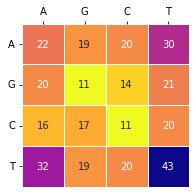

<Figure size 432x288 with 0 Axes>

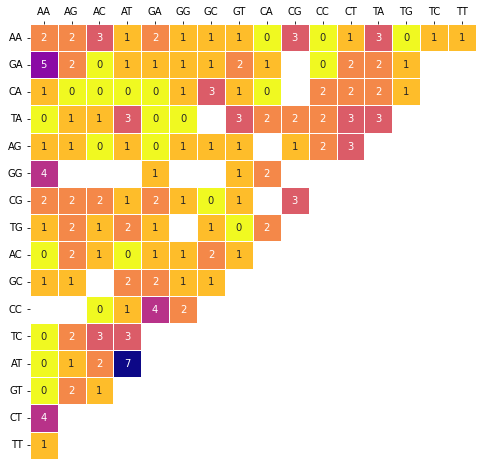

<Figure size 432x288 with 0 Axes>

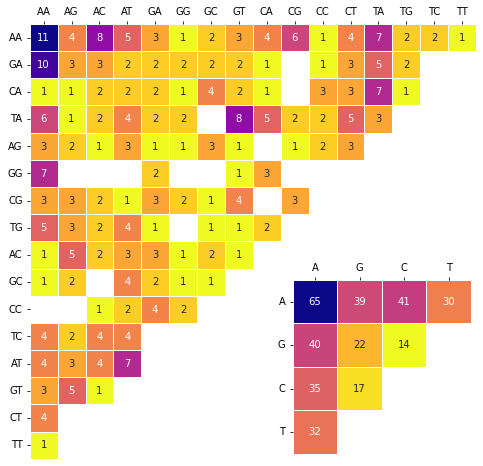

<Figure size 432x288 with 0 Axes>

In [205]:
COLORMAP = "plasma_r"

fig, ax = plt.subplots(figsize=(3,3))

sns.heatmap(data=full_dimer_df,
            cbar=False, annot=True,fmt='d',
            cmap=COLORMAP,
            linewidths=1,linecolor='white',
           ax=ax)
ax.xaxis.tick_top()
plt.yticks(rotation=0)
plt.show()
plt.clf()

fig, ax = plt.subplots(figsize=(8,8))

sns.heatmap(data=full_tetramer_df,
            cbar=False, annot=True,fmt='d',
            cmap=COLORMAP,
            linewidths=1,linecolor='white',
            mask=( tetramer_df==0 ),
           ax=ax)
ax.xaxis.tick_top()
plt.yticks(rotation=0)
plt.show()
plt.clf()



fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(data=tetramer_df,
            cbar=False, annot=True,fmt='d',
            cmap=COLORMAP,
            linewidths=1,linecolor='white',
            mask=( tetramer_df==0 ),
           ax=ax)
ax.xaxis.tick_top()
plt.yticks(rotation=0)

axins = inset_axes(ax,  "40%", "40%" ,loc="lower right", borderpad=0.5)
sns.heatmap(data=dimer_df,
            cbar=False, annot=True,fmt='d',
            cmap=COLORMAP,
            linewidths=1,linecolor='white', 
            mask=( dimer_df==0 ),
           ax=axins)
axins.xaxis.tick_top()
plt.yticks(rotation=0)
plt.show()
plt.clf()

del COLORMAP

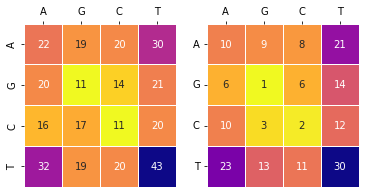

<Figure size 432x288 with 0 Axes>

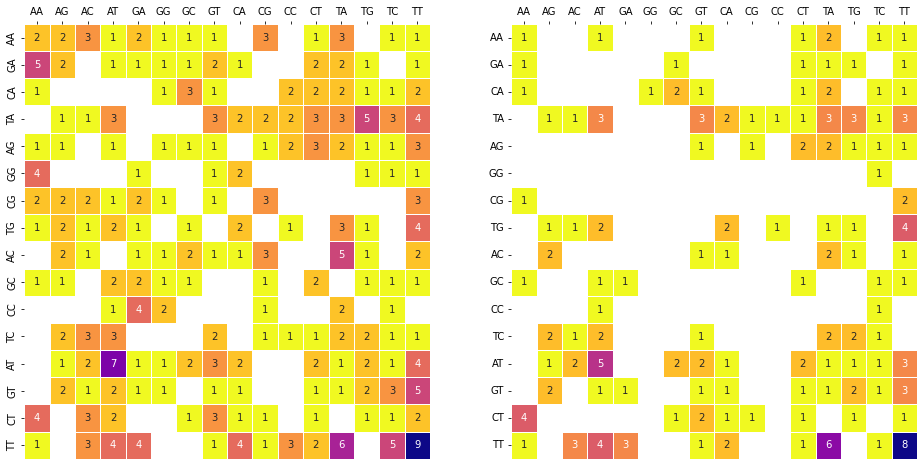

<Figure size 432x288 with 0 Axes>

In [225]:
COLORMAP = "plasma_r"

fig, axes = plt.subplots(1,2,figsize=(6,3))

sns.heatmap(data=full_dimer_df,
            cbar=False, annot=True,fmt='d',
            cmap=COLORMAP,
            linewidths=1,linecolor='white',
           ax=axes[0])

sns.heatmap(data=attr_full_dimer_df,
            cbar=False, annot=True,fmt='d',
            cmap=COLORMAP,
            linewidths=1,linecolor='white',
           ax=axes[1])

for ax in axes:
    ax.xaxis.tick_top()
    
plt.yticks(rotation=0)
plt.show()
plt.clf()

fig, axes = plt.subplots(1,2,figsize=(16,8))

sns.heatmap(data=full_tetramer_df,
            cbar=False, annot=True,fmt='d',
            cmap=COLORMAP,
            linewidths=1,linecolor='white', mask=( full_tetramer_df==0 ),
           ax=axes[0])

sns.heatmap(data=attr_full_tetramer_df,
            cbar=False, annot=True,fmt='d',
            cmap=COLORMAP,
            linewidths=1,linecolor='white', mask=( attr_full_tetramer_df==0 ),
           ax=axes[1])

for ax in axes:
    ax.xaxis.tick_top()
    
plt.yticks(rotation=0)
plt.show()
plt.clf()

### Sequence Plotting

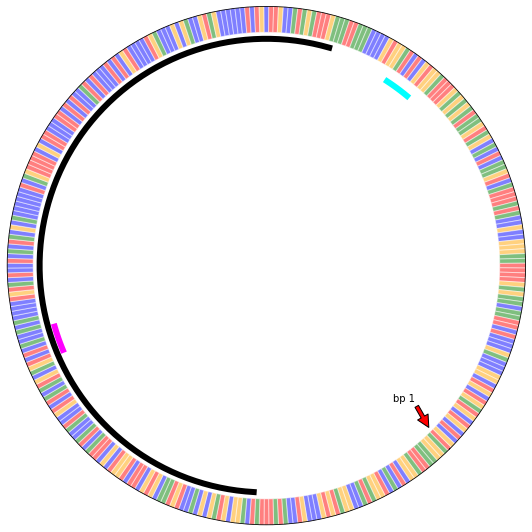

<Figure size 432x288 with 0 Axes>

In [4]:
seqdf = pd.DataFrame(index=['seq','B'], columns=[i+1 for i in range(len(zech336))])
rads = np.arange(0, 2*np.pi, 2*np.pi/336)
for i in range(len(zech336)):
    seqdf.at['seq', i+1]=zech336[i:i+1]
    seqdf.at['polar',i+1]=rads[i]

BASE_COLOR={'A':'red','G':'green','T':'blue','C':'orange'}


fig, ax = plt.subplots(1,1,figsize=(7.5,7.5),
                       subplot_kw={"projection":"polar"})

    
plt.bar(x=seqdf.loc['polar'],
        height=1, 
        width=(2*np.pi/336),
        color=[BASE_COLOR[x] for x in seqdf.loc['seq']], edgecolor="white", alpha=0.50,
        bottom=0.90)

plt.plot(seqdf.loc['polar'][45:45+181], [0.875 for i in range(181)], color='black', linewidth=6)
plt.plot(seqdf.loc['polar'][241:241+7], [0.850 for i in range(7)], color='cyan', linewidth=6)
plt.plot(seqdf.loc['polar'][105:105+7], [0.850 for i in range(7)], color='magenta', linewidth=6)


ax.set_theta_zero_location("SE")
ax.set_theta_direction(-1)
ax.set_ylim(0, 1)
ax.set_yticklabels([])
ax.set_xticklabels([])



ax.annotate('bp 1',
            xy=(seqdf.loc['polar'][1], 0.89),  # theta, radius
            xytext=(seqdf.loc['polar'][1], 0.75),
            textcoords="data",
            arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='center',
            verticalalignment='bottom'
           )


ax.grid(False)

plt.tight_layout()
plt.show()
plt.clf()

del seqdf